In [21]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [31]:
import numpy as np
import time

from pprint import pprint
from tqdm import tqdm
import matplotlib.pyplot as plt
from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import build_default_calc, build_default_source
from lenstronomy.Util import data_util
from lenstronomy.SimulationAPI.ObservationConfig.Roman import Roman

from package.helpers import test_physical_lens
from package.pandeia import pandeia_input
from package.plots import diagnostic_plot, plot

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

In [23]:
csv = os.path.join(repo_path, 'data', 'roman_spacecraft_and_instrument_parameters.csv')
figure_dir = os.path.join(repo_path, 'figures')
array_dir = os.path.join(repo_path, 'output', 'arrays', 'no_noise_or_background')

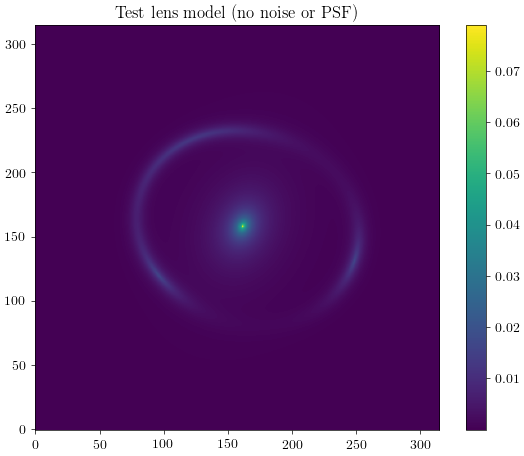

In [32]:
oversample_factor = 7

physical_lens = test_physical_lens.TestPhysicalLens()
model = physical_lens.get_array(num_pix=45 * oversample_factor)

plot.plot(filepath=None,
          title='Test lens model (no noise or PSF)',
          array=model,
          colorbar=True)

In [25]:
calc = pandeia_input.build_pandeia_calc(csv=csv,
                                        array=model, 
                                        lens=physical_lens, 
                                        band='f106', 
                                        oversample_factor=oversample_factor)

100%|██████████| 315/315 [00:00<00:00, 1827.16it/s]


Converting (315, 315) array to point sources...


  0%|          | 0/315 [00:00<?, ?it/s]

100%|██████████| 315/315 [11:38<00:00,  2.22s/it]

Point source conversion complete: 99225 point sources


In [26]:
# turn background off. options include 'none', 'minzodi' (default), and 'ecliptic'
calc['background'] = 'none'

In [27]:
# turn all noise and effects off
calculation_dict = pandeia_input.get_calculation_dict(init=False)

calc['calculation'] = calculation_dict

In [28]:
detector_no_noise_or_background, execution_time = pandeia_input.get_pandeia_image(calc)
print(f'Execution time: {execution_time}')


Performing Pandeia calculation...


Pandeia calculation complete
Execution time: 2:26:27


In [29]:
np.save(os.path.join(array_dir, f'detector_no_noise_or_background_{oversample_factor}'), detector_no_noise_or_background)

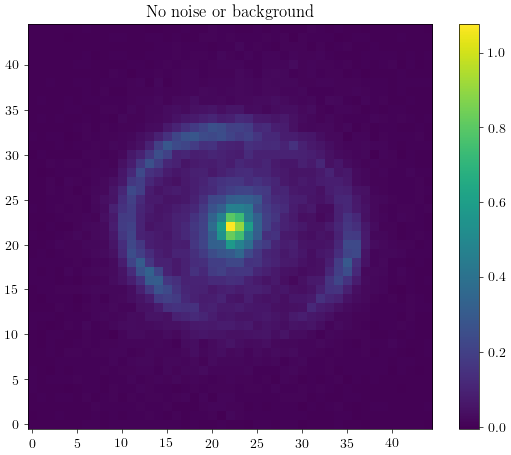

In [33]:
plot.plot(filepath=None, 
          title='No noise or background', 
          array=detector_no_noise_or_background,
          colorbar=True)